## Case Study: Using PCA to Optimize Health Risk Prediction from Biomarker Data

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the Dataset

In [2]:
data = pd.read_csv("health_risk_dataset.csv")

#### Inspect the dataset

In [3]:
data.head()

,PatientID,Age,BMI,BloodPressureSys,BloodPressureDia,CholesterolTotal,CholesterolHDL,CholesterolLDL,GlucoseFasting,HemoglobinA1c,SmokingStatus,AlcoholConsumption,ExerciseFrequency,RiskScore
0,1,56,18.4,152.8,93.9,204.6,43.2,134.0,108.8,6.1,1,20.3,2,1
1,2,69,34.2,162.5,111.1,231.3,63.3,146.9,109.3,5.9,0,4.3,3,1
2,3,46,30.9,145.9,101.7,244.3,55.6,153.6,125.6,6.8,0,2.8,1,1
3,4,32,22.7,135.0,87.0,175.6,46.3,90.2,102.7,5.8,0,0.7,2,0
4,5,60,18.0,137.7,97.0,215.2,50.4,140.0,118.3,6.2,0,1.6,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PatientID           1000 non-null   int64  
 1   Age                 1000 non-null   int64  
 2   BMI                 1000 non-null   float64
 3   BloodPressureSys    1000 non-null   float64
 4   BloodPressureDia    1000 non-null   float64
 5   CholesterolTotal    1000 non-null   float64
 6   CholesterolHDL      1000 non-null   float64
 7   CholesterolLDL      1000 non-null   float64
 8   GlucoseFasting      1000 non-null   float64
 9   HemoglobinA1c       1000 non-null   float64
 10  SmokingStatus       1000 non-null   int64  
 11  AlcoholConsumption  1000 non-null   float64
 12  ExerciseFrequency   1000 non-null   int64  
 13  RiskScore           1000 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 109.5 KB


In [5]:
data.describe()

,PatientID,Age,BMI,BloodPressureSys,BloodPressureDia,CholesterolTotal,CholesterolHDL,CholesterolLDL,GlucoseFasting,HemoglobinA1c,SmokingStatus,AlcoholConsumption,ExerciseFrequency,RiskScore
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,50.380000,25.357000,145.645400,100.370000,209.965800,52.490900,127.711400,110.103200,6.009500,0.310000,5.115900,2.26200,0.531000
std,288.819436,18.378666,4.709468,11.156764,8.543014,19.790784,7.920088,16.929342,13.030437,0.719651,0.462725,4.419295,1.40047,0.499288
min,1.000000,18.000000,18.000000,117.500000,79.800000,146.600000,33.300000,80.200000,75.000000,4.000000,0.000000,0.000000,0.00000,0.000000
25%,250.750000,35.000000,21.900000,137.400000,93.900000,197.175000,46.400000,115.700000,100.875000,5.500000,0.000000,2.000000,1.00000,0.000000
50%,500.500000,50.000000,25.200000,145.600000,100.200000,209.550000,52.050000,127.600000,110.300000,6.000000,0.000000,3.800000,2.00000,1.000000
75%,750.250000,66.000000,28.400000,154.300000,107.300000,223.725000,58.000000,139.500000,119.200000,6.500000,1.000000,6.800000,3.00000,1.000000
max,1000.000000,80.000000,40.400000,175.200000,120.000000,268.300000,76.500000,178.600000,149.300000,8.400000,1.000000,22.000000,5.00000,1.000000


In [6]:
# Check class distribution for the target variable
data["RiskScore"].value_counts()


RiskScore
1    531
0    469
Name: count, dtype: int64

#### Correlation Analysis
Perform initial visualizations to understand relationships.

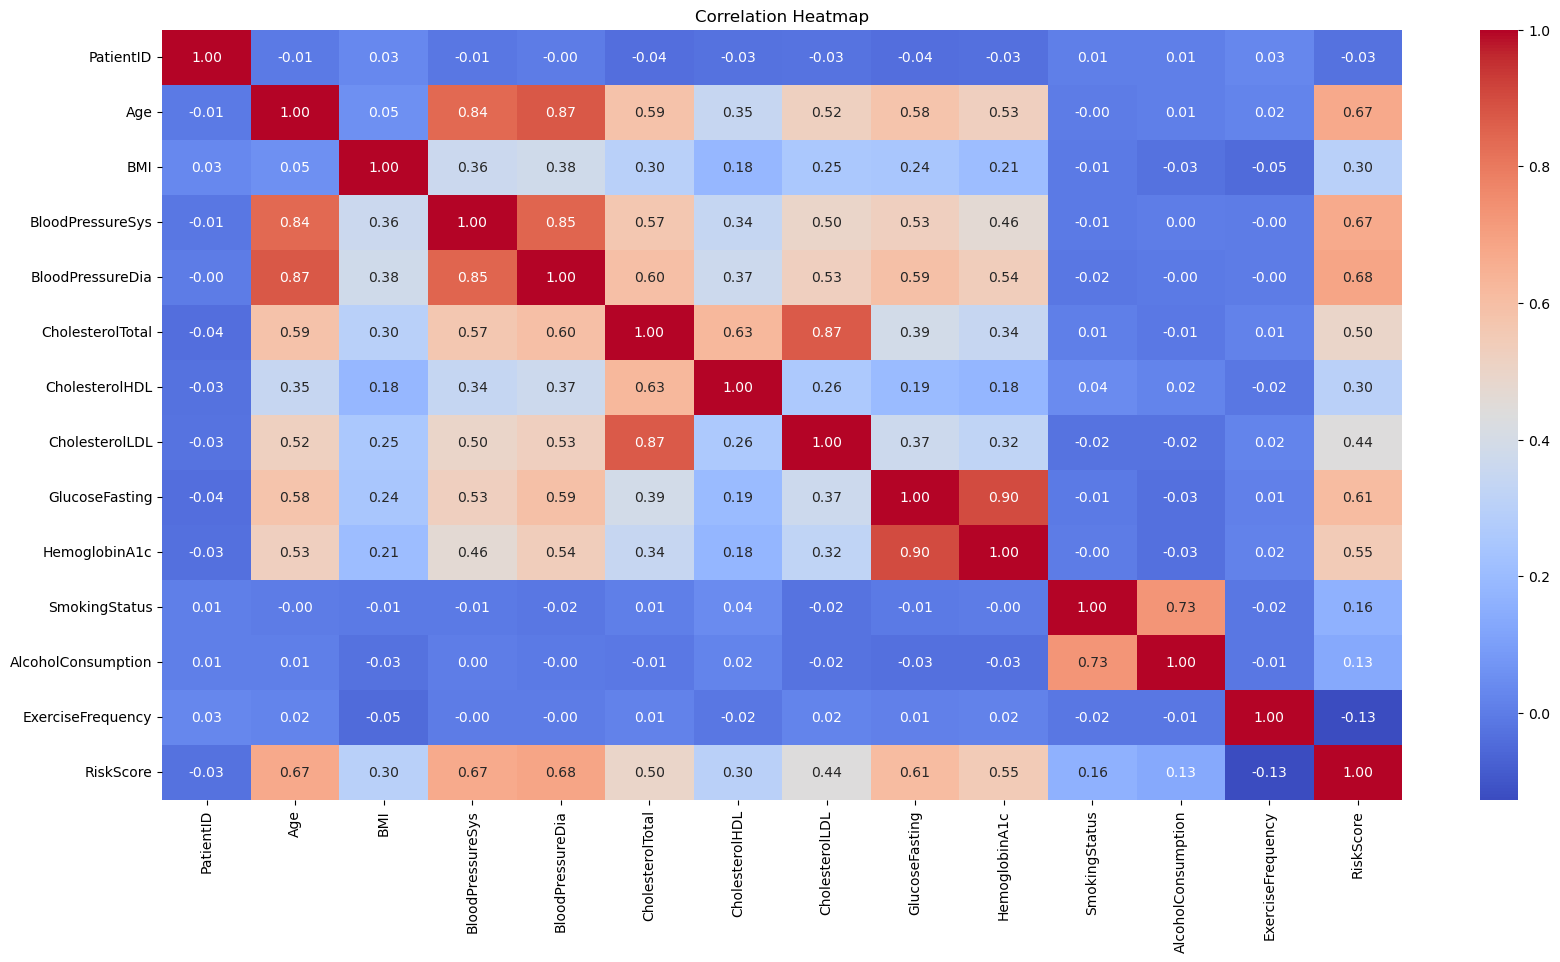

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Preprocess Data
- Split data into features and target
- Split data into train and test data
- Scalling features in the data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Split data into features and target
X = data.drop(columns=["PatientID", "RiskScore"])
y = data["RiskScore"]

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Baseline Model (Logistic Regression without PCA)
Train a baseline Logistic Regression model to establish performance without PCA.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [13]:
# Train a Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [14]:
# Evaluate the model
y_pred = lr.predict(X_test_scaled)
print("Baseline Model Performance:")
print(classification_report(y_test, y_pred))

Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        94
           1       0.92      0.92      0.92       106

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



#### Incorporate PCA
Apply PCA for dimensionality reduction and retrain the model.

In [15]:
from sklearn.decomposition import PCA

In [16]:
# Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [17]:
# Train Logistic Regression with PCA-transformed data
lr_pca = LogisticRegression(random_state=42)
lr_pca.fit(X_train_pca, y_train)

LogisticRegression(random_state=42)

In [18]:
# Evaluate the PCA-based model
y_pred_pca = lr_pca.predict(X_test_pca)
print("PCA-based Model Performance:")
print(classification_report(y_test, y_pred_pca))

PCA-based Model Performance:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        94
           1       0.93      0.93      0.93       106

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [19]:
# import numpy as np
# variances = np.arange(0.1, 0.99, 0.05)
# variances = [0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6, 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]

In [20]:
variances = [0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6, 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]

In [21]:
for var in variances:
    pca = PCA(n_components=var)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    lr_pca.fit(X_train_pca, y_train)
    print(f"Accuracy with {var*100:.0f}% Variance: {accuracy_score(y_test, lr_pca.predict(X_test_pca)):.2f}")

Accuracy with 10% Variance: 0.86
Accuracy with 15% Variance: 0.86
Accuracy with 20% Variance: 0.86
Accuracy with 25% Variance: 0.86
Accuracy with 30% Variance: 0.86
Accuracy with 35% Variance: 0.86
Accuracy with 40% Variance: 0.86
Accuracy with 45% Variance: 0.88
Accuracy with 50% Variance: 0.88
Accuracy with 55% Variance: 0.92
Accuracy with 60% Variance: 0.92
Accuracy with 65% Variance: 0.92
Accuracy with 70% Variance: 0.94
Accuracy with 75% Variance: 0.94
Accuracy with 80% Variance: 0.94
Accuracy with 85% Variance: 0.94
Accuracy with 90% Variance: 0.94
Accuracy with 95% Variance: 0.93


#### Plot the explained variance ratio

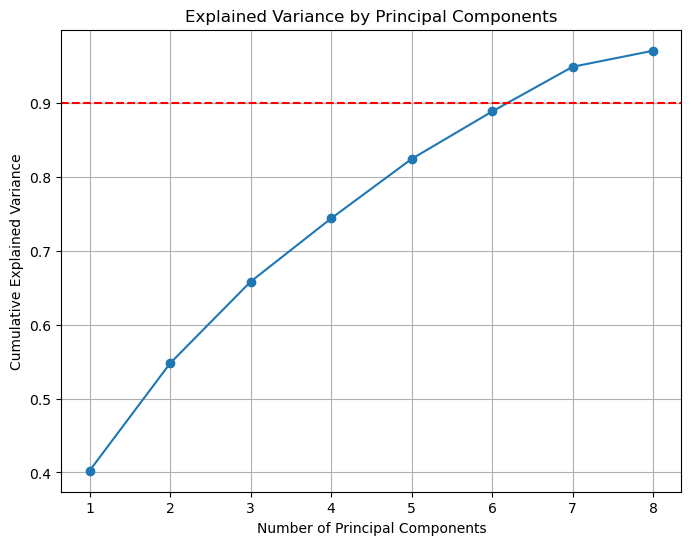

In [22]:
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [23]:
# Apply PCA
pca = PCA(n_components=0.7)  # Preserve 70% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Train Random Forest with PCA-transformed data
lr_pca = LogisticRegression(random_state=42)
lr_pca.fit(X_train_pca, y_train)
# Evaluate the PCA-based model
y_pred_pca = lr_pca.predict(X_test_pca)
print("PCA-based Model Performance:")
print(classification_report(y_test, y_pred_pca))

PCA-based Model Performance:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        94
           1       0.96      0.92      0.94       106

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



#### Model Comparison
Compare the models' performance with and without PCA.

In [24]:
# Compare accuracy
print(f"Baseline Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"PCA Model Accuracy: {accuracy_score(y_test, y_pred_pca):.2f}")

Baseline Model Accuracy: 0.92
PCA Model Accuracy: 0.94


#### Visualizing Feature Contributions
Visualizing feature contributions with and without PCA provides insights into the model's decision-making process and highlights the differences between the original and PCA-transformed features.

#### Without PCA: Feature Importance for Logistic Regression
For logistic regression, feature importance can be interpreted using the absolute values of the coefficients.

In [25]:
# Get feature importance (coefficients)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

In [26]:
coefficients

,Feature,Coefficient
7,GlucoseFasting,1.810199
0,Age,1.201337
2,BloodPressureSys,1.194943
9,SmokingStatus,1.003964
1,BMI,0.816411
3,BloodPressureDia,0.348621
4,CholesterolTotal,0.272161
10,AlcoholConsumption,0.269388
5,CholesterolHDL,0.069011
6,CholesterolLDL,-0.030930


C:\Users\Oladayo\AppData\Local\Temp\ipykernel_20844\976552117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coefficients, palette="coolwarm")


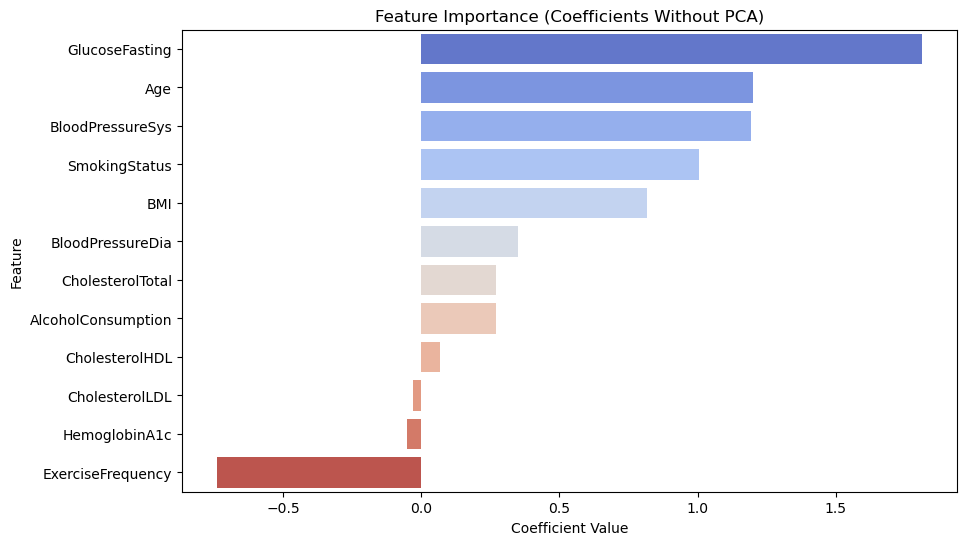

In [27]:
# Visualize coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coefficients, palette="coolwarm")
plt.title("Feature Importance (Coefficients Without PCA)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [28]:
lr_pca.coef_[0]

array([ 1.78402763,  0.72937283,  0.73263951, -0.82635843])

### With PCA: Logistic Regression on Principal Components
When using PCA-transformed data, visualize how the model interprets the principal components.

In [29]:
# Get coefficients for PCA components
pca_coefficients = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(X_train_pca.shape[1])],
    "Coefficient": lr_pca.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
pca_coefficients

,Principal Component,Coefficient
0,PC1,1.784028
2,PC3,0.732640
1,PC2,0.729373
3,PC4,-0.826358


C:\Users\Oladayo\AppData\Local\Temp\ipykernel_20844\1629781594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Principal Component", data=pca_coefficients, palette="coolwarm")


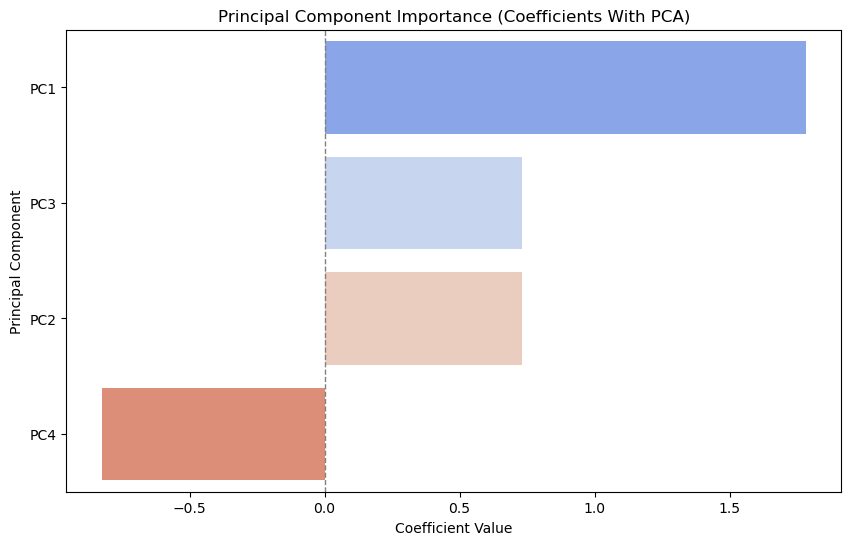

In [30]:
# Visualize coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Principal Component", data=pca_coefficients, palette="coolwarm")
plt.title("Principal Component Importance (Coefficients With PCA)")
plt.xlabel("Coefficient Value")
plt.ylabel("Principal Component")
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.show()


#### Without PCA:

- The coefficients directly show the impact of each feature on the target variable.
- Positive coefficients indicate an increase in the likelihood of the positive class, while negative coefficients indicate a decrease.

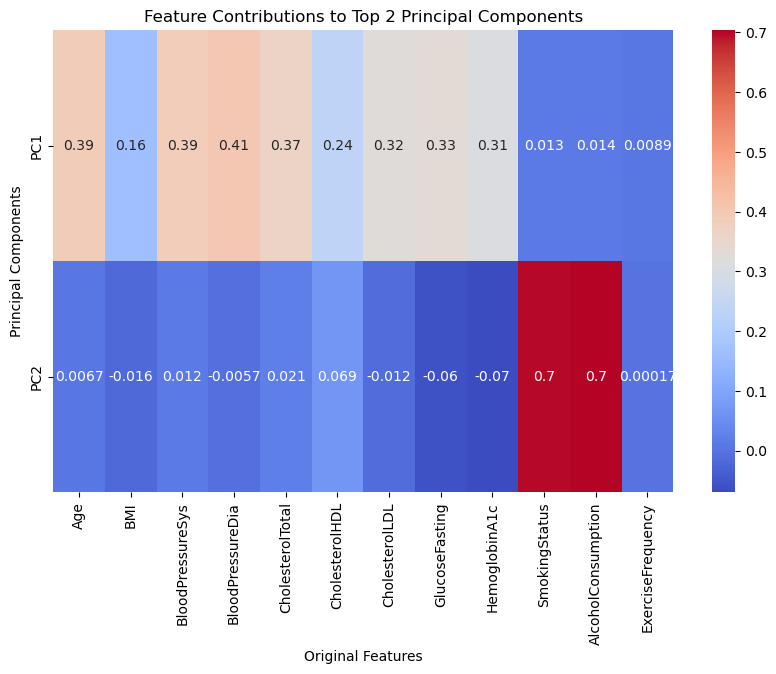

In [31]:
# Visualize contributions of the top two principal components to original features
plt.figure(figsize=(10, 6))
sns.heatmap(pca.components_[:2], annot=True, cmap="coolwarm", cbar=True,
            xticklabels=X.columns, yticklabels=[f"PC{i+1}" for i in range(2)])
plt.title("Feature Contributions to Top 2 Principal Components")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()


#### With PCA:

- The coefficients of the principal components describe their contribution to the model.
- The heatmap helps relate these components back to the original features, enabling interpretation in the original feature space.
